# Process the NYC House Value data from Zillow  
Zhonghan (Jonas) Xie  
Data source: [Zillow](https://www.zillow.com/research/data/?msockid=38d5e17d86ff660f269ef545876967bd)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
neighbor_HVI = pd.read_csv('./data/zillow_HVI_neighborhood.csv.gz', compression='gzip')
zip_HVI = pd.read_csv('./data/zillow_HVI_ZIP.csv.gz', compression='gzip')

In [4]:
nyc_neighbor_HVI = neighbor_HVI[neighbor_HVI['City'] == 'New York']

In [5]:
nyc_neighbor_HVI.drop(columns = ['City', 'State', 'Metro', 'StateName', 'SizeRank', 'RegionType'], inplace = True)

/tmp/ipykernel_131365/40422110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_neighbor_HVI.drop(columns = ['City', 'State', 'Metro', 'StateName', 'SizeRank', 'RegionType'], inplace = True)


In [6]:
nyc_neighbor_HVI.sample(5)

,RegionID,RegionName,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
118,343214,Fordham,Bronx County,201036.166629,202098.949814,202502.711088,204262.675979,206151.125868,208809.363789,211563.847428,...,3.425036e+05,3.468832e+05,3.535571e+05,3.625444e+05,3.682052e+05,3.730960e+05,3.709943e+05,3.654660e+05,3.584693e+05,3.526123e+05
6400,403200,Silver Lake,Richmond County,244192.183193,245223.094699,245734.426485,247914.738491,251314.580661,255688.839143,259650.426202,...,7.325232e+05,7.342479e+05,7.370596e+05,7.408802e+05,7.458555e+05,7.513150e+05,7.550825e+05,7.571748e+05,7.587768e+05,7.603130e+05
2308,403125,Meiers Corners,Richmond County,207578.237128,209282.114894,210502.933788,212403.149635,214175.116045,215976.809371,218292.887472,...,7.025895e+05,7.034818e+05,7.065959e+05,7.114249e+05,7.164453e+05,7.202330e+05,7.219126e+05,7.231153e+05,7.248419e+05,7.267587e+05
170,276254,Chelsea,New York County,599283.644051,603888.523640,608273.207726,615639.969691,623852.474536,632017.257258,641377.230534,...,1.501822e+06,1.488618e+06,1.479004e+06,1.475198e+06,1.474502e+06,1.474336e+06,1.470678e+06,1.471023e+06,1.475146e+06,1.478024e+06
1199,35961,Rockaway Park,Queens County,286165.012461,289214.868319,291304.557550,294150.868841,294874.191238,296016.330083,299067.223111,...,5.363871e+05,5.364031e+05,5.376213e+05,5.402560e+05,5.438851e+05,5.468922e+05,5.496254e+05,5.523340e+05,5.562822e+05,5.595793e+05


In [7]:
# Reshape the data from wide to long
nyc_neighbor_HVI_long = pd.melt(nyc_neighbor_HVI, id_vars = ['RegionID','RegionName','CountyName'], var_name = 'Date', value_name = 'HVI')

In [8]:
# Convert the Date column to datetime and extract the year
nyc_neighbor_HVI_long['Date'] = pd.to_datetime(nyc_neighbor_HVI_long['Date'])
nyc_neighbor_HVI_long['Year'] = nyc_neighbor_HVI_long['Date'].dt.year

In [9]:
# inspect the dataframe
nyc_neighbor_HVI_long.sample(5)

,RegionID,RegionName,CountyName,Date,HVI,Year
32069,10957,Corona,Queens County,2013-06-30,283578.993195,2013
10446,274415,Flatlands,Kings County,2004-05-31,288601.819376,2004
56613,273653,Eltingville,Richmond County,2023-09-30,693197.583709,2023
1243,194474,East Tremont,Bronx County,2000-07-31,222297.768488,2000
15415,196213,Mariner's Harbor,Richmond County,2006-06-30,296960.440993,2006


In [10]:
# Save the Neighborhood HVI data
nyc_neighbor_HVI_long.to_csv('./data/nyc_neighbor_HVI.csv.gz', index = False, compression='gzip')

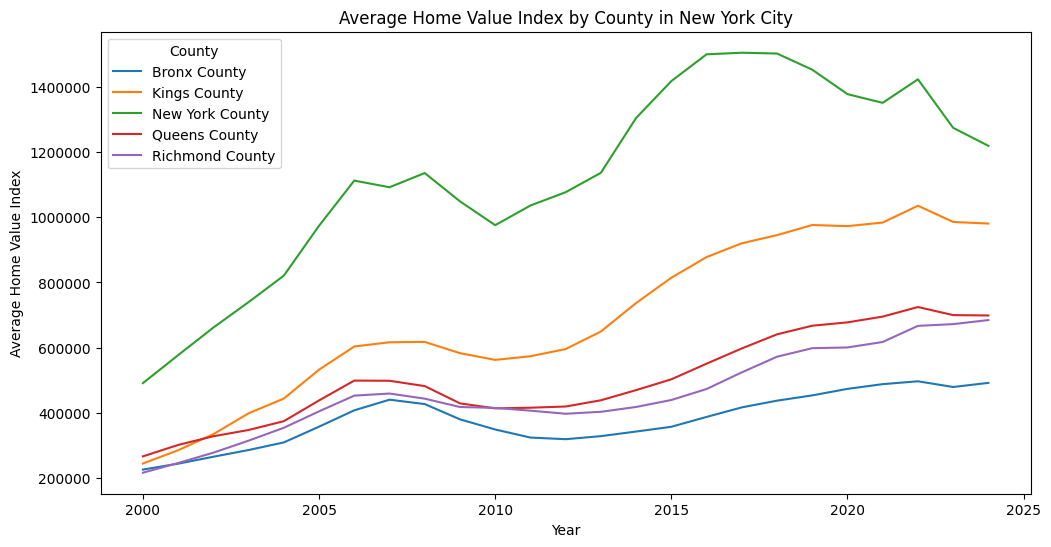

In [11]:
# Calculate the average HVI for each County by year
nyc_neighbor_HVI_avg = nyc_neighbor_HVI_long.groupby(['CountyName','Year']).agg({'HVI':'mean'}).reset_index()

# Plot the average HVI for each County by year
plt.figure(figsize=(12,6))
sns.lineplot(data = nyc_neighbor_HVI_avg, x = 'Year', y = 'HVI', hue = 'CountyName')
plt.title('Average Home Value Index by County in New York City')
plt.xlabel('Year')
plt.ylabel('Average Home Value Index')
plt.ticklabel_format(style='plain', axis='y') 
plt.legend(title = 'County')
#plt.grid(True)
plt.show()

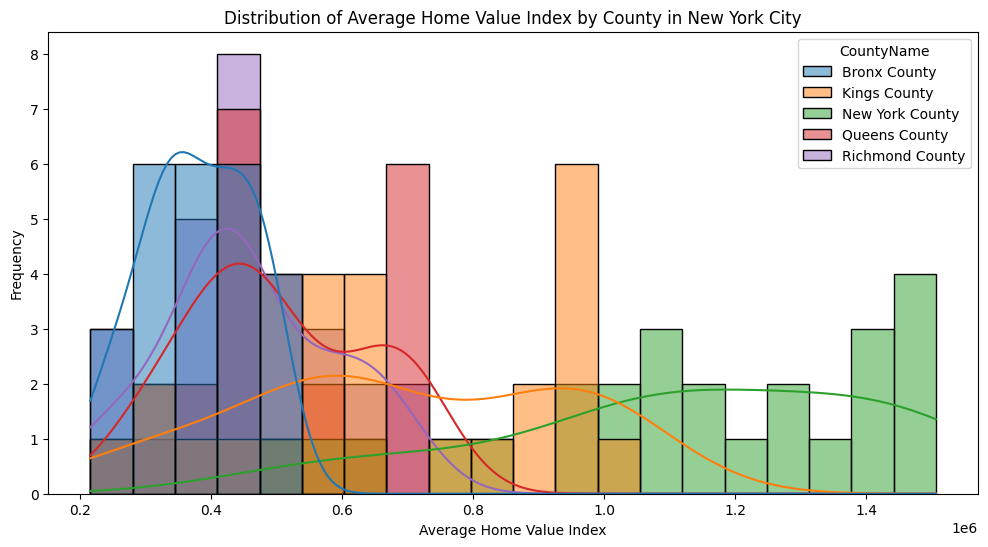

In [12]:
# Plot the histogram of the average HVI for each County
plt.figure(figsize=(12,6))
sns.histplot(data = nyc_neighbor_HVI_avg, x = 'HVI', hue = 'CountyName', bins = 20, kde = True)
plt.title('Distribution of Average Home Value Index by County in New York City')
plt.xlabel('Average Home Value Index')
plt.ylabel('Frequency')
plt.show()

In [14]:
nyc_neighbor_HVI_avg.head()

,CountyName,Year,HVI
0,Bronx County,2000,224911.095771
1,Bronx County,2001,243062.045115
2,Bronx County,2002,264350.206288
3,Bronx County,2003,285005.490784
4,Bronx County,2004,308358.040959


In [ ]:
# write the data to a csv file
nyc_neighbor_HVI_avg.to_csv('./data/nyc_neighbor_HVI_avg.csv', index = False)